<a href="https://colab.research.google.com/github/RuchaKardile/Credit-Risk-Modeling/blob/main/Credit_Risk_Modeling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this project, I explored and cleanse a dataset consisting of over 111,000 loan records to determine the best way to predict whether a loan applicant will fully repay or default on a loan. Then I build a machine learning model that returns the unique loan ID and a loan status label that indicates whether the loan will be fully paid or charged off.

![CRM.png](attachment:CRM.png)

## Getting All Dependencies

In [1]:
# Avoiding Warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import sklearn
sklearn.__version__

'1.2.2'

In [3]:
# Importing Dependencies
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

## Loading the data

In [4]:
# Importing Dataset
data = pd.read_csv('LoansTrainingSet.csv')

In [5]:
# For each column heading we replace " " and convert the heading in lowercase
cleancolumn = []
for i in range(len(data.columns)):
    cleancolumn.append(data.columns[i].replace(' ', '_').lower())
data.columns = cleancolumn

In [6]:
data.head(20)

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280,< 1 year,Rent,46643,Debt Consolidation,777.39,18.000,10.000,12,0,6762,7946,0.000,0.000
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330,10+ years,Home Mortgage,81099,Debt Consolidation,892.09,26.700,NaN,14,0,35706,77961,0.000,0.000
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240,9 years,Home Mortgage,60438,Home Improvements,1244.02,16.700,32.000,11,1,11275,14815,1.000,0.000
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400,3 years,Rent,34171,Debt Consolidation,990.94,10.000,NaN,21,0,7009,43533,0.000,0.000
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860,10+ years,Home Mortgage,47003,Home Improvements,503.71,16.700,25.000,13,1,16913,19553,1.000,0.000
5,7e9f6759-6a13-48ef-adfa-ef9fbcfcfcc8,05301ee5-29ec-48b6-b3e5-0813ea25d684,Charged Off,11911,Short Term,7420,2 years,Home Mortgage,70475,other,886.81,17.700,NaN,13,0,28212,59897,0.000,0.000
6,c2b0aa3e-555b-441b-a4aa-e0e4a52c87d3,db3e74ec-2123-4608-be8d-a93e98cabfcf,Charged Off,28988,Short Term,7420,3 years,Home Mortgage,58074,Debt Consolidation,871.11,22.800,NaN,9,0,14423,54018,0.000,0.000
7,233e0119-6dfe-47c0-a212-b4cc00371c8d,def66e46-951e-4bff-bf96-87ae6e092e19,Charged Off,17705,Long Term,6630,3 years,Own Home,49180,Debt Consolidation,274.59,30.200,NaN,10,1,4252,25012,1.000,0.000
8,fc9d109b-15c2-4fe3-b7d8-27610b89f80b,f54c53e4-acd7-4e29-8f55-d2a247a4b62a,Charged Off,16812,Short Term,7360,7 years,Rent,50945,Debt Consolidation,590.12,14.600,NaN,9,0,12903,15379,0.000,0.000
9,35ee60ed-df2d-4d3a-98ba-03d944d65c74,93cbb4b9-4e88-4b93-8beb-a2a00d415cd5,Charged Off,9796,Long Term,6720,< 1 year,Rent,58776,Debt Consolidation,666.13,9.400,17.000,12,0,4939,15198,0.000,0.000


In [7]:
data.describe()

,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,16932.000,16932.000,16932.000,16932.000,7598.000,16932.000,16932.000,16932.000,16892.000,16930.000
mean,70214692.381,2627.328,72226.316,18.341,35.228,11.173,0.166,15547.362,0.115,0.031
std,45727953.109,2924.227,82114.278,7.114,22.175,5.065,0.486,22688.240,0.346,0.271
min,976.000,587.000,4815.000,3.800,0.000,1.000,0.000,0.000,0.000,0.000
25%,24177.250,726.000,44303.750,13.500,16.000,8.000,0.000,6004.500,0.000,0.000
50%,99999999.000,742.000,61038.000,17.000,32.000,10.000,0.000,11108.000,0.000,0.000
75%,99999999.000,6810.000,86139.000,21.800,52.000,14.000,0.000,19456.000,0.000,0.000
max,99999999.000,7510.000,8713547.000,59.500,152.000,76.000,12.000,1730472.000,5.000,9.000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16932 entries, 0 to 16931
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_id                       16932 non-null  object 
 1   customer_id                   16932 non-null  object 
 2   loan_status                   16932 non-null  object 
 3   current_loan_amount           16932 non-null  int64  
 4   term                          16932 non-null  object 
 5   credit_score                  16932 non-null  int64  
 6   years_in_current_job          16216 non-null  object 
 7   home_ownership                16932 non-null  object 
 8   annual_income                 16932 non-null  int64  
 9   purpose                       16932 non-null  object 
 10  monthly_debt                  16932 non-null  object 
 11  years_of_credit_history       16932 non-null  float64
 12  months_since_last_delinquent  7598 non-null   float64
 13  n

In [9]:
print(data.shape)

(16932, 19)


## Removing Duplicates

#### Loan ID is unique for every loan process so we will use Loan ID to remove duplicates

In [10]:
# Check the unique values, to see if there is any duplicates
unique_loanid=data['loan_id'].unique().tolist()
print("Total samples in data:", str(data.shape[0]))
print("Total unique samples in data:", str(len(unique_loanid)))
print("Duplicate samples in data:", str(data.shape[0] - len(unique_loanid)))

Total samples in data: 16932
Total unique samples in data: 16932
Duplicate samples in data: 0


In [11]:
# Drop the duplicates
data = data.drop_duplicates()
print("Total samples in data:", str(data.shape[0]))
print("Total unique samples in data:", str(len(unique_loanid)))
print("Duplicate samples in data:", str(data.shape[0] - len(unique_loanid)))

Total samples in data: 16932
Total unique samples in data: 16932
Duplicate samples in data: 0


In [12]:
#Get the duplicates
dup_loanid=data[data.duplicated(['loan_id'],keep=False)]
print(dup_loanid.shape)
dup_loanid.describe()

(0, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# dup_loanid.tail(5)
dup_loanid[dup_loanid.loan_id == 'c02558d1-58cb-4b36-9569-ae55baeb328a']
# dup_loanid[dup_loanid.loan_id == '9a411ca4-2d32-4f92-aefa-337c5562741b']

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [14]:
#Sort the duplicate dataframe in ascending order with NA's in last
sorted_df=dup_loanid.sort_values(['current_loan_amount', 'credit_score'], ascending=True, na_position='last')
sorted_df.tail(10)

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [15]:
#Considering samples which are genuine
correct_df = sorted_df.drop_duplicates(['loan_id'], keep='first')
print(correct_df.shape)
correct_df.head()

(0, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [16]:
#Check if there is any such placeholder in duplicates
correct_df[correct_df['current_loan_amount']==99999999]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [17]:
#check if there is still Na's in duplicates
correct_df[correct_df['credit_score'].isnull()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [18]:
# Droping the duplicate loan ID's
data.drop_duplicates(['loan_id'], keep=False, inplace=True)

In [19]:
data.shape

(16932, 19)

In [20]:
# Getting the final train data which is all genuine
data = data.append(correct_df, ignore_index=True)
print(data.shape)
data.describe()

(16932, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,16932.000,16932.000,16932.000,16932.000,7598.000,16932.000,16932.000,16932.000,16892.000,16930.000
mean,70214692.381,2627.328,72226.316,18.341,35.228,11.173,0.166,15547.362,0.115,0.031
std,45727953.109,2924.227,82114.278,7.114,22.175,5.065,0.486,22688.240,0.346,0.271
min,976.000,587.000,4815.000,3.800,0.000,1.000,0.000,0.000,0.000,0.000
25%,24177.250,726.000,44303.750,13.500,16.000,8.000,0.000,6004.500,0.000,0.000
50%,99999999.000,742.000,61038.000,17.000,32.000,10.000,0.000,11108.000,0.000,0.000
75%,99999999.000,6810.000,86139.000,21.800,52.000,14.000,0.000,19456.000,0.000,0.000
max,99999999.000,7510.000,8713547.000,59.500,152.000,76.000,12.000,1730472.000,5.000,9.000


## Cleaning the data
#### Feature: Years in Current Job
Remove the special charachters and other words and make it numeric.

In [21]:
data['years_in_current_job'].unique()

array(['< 1 year', '10+ years', '9 years', '3 years', '2 years',
       '7 years', '6 years', '1 year', '5 years', '4 years', '8 years',
       nan], dtype=object)

In [22]:
data['years_in_current_job'] = [0 if str(x)=='< 1 year' else x if str(x)=='nan' else int(re.findall(r'\d+', str(x))[0]) for x in data['years_in_current_job']]
data['years_in_current_job'].unique()

array([ 0., 10.,  9.,  3.,  2.,  7.,  6.,  1.,  5.,  4.,  8., nan])

#### Feature: Credit Score
Credit Score range is from 0 to 800 but there are some values greater than this basically this is some data error.

In [23]:
data['credit_score'].head(10)

0    7280
1    7330
2    7240
3    7400
4    6860
5    7420
6    7420
7    6630
8    7360
9    6720
Name: credit_score, dtype: int64

In [24]:
# Function to bring credit score in range
def credit_range(x):
    if x > 800:
        return int(x/10)
    elif str(x) == 'nan' :
        return x
    else:
        return int(x)

In [25]:
data['credit_score'] = data['credit_score'].map(credit_range)
data['credit_score'].head(10)

0    728
1    733
2    724
3    740
4    686
5    742
6    742
7    663
8    736
9    672
Name: credit_score, dtype: int64

#### Feature: Maximum Open Credit
There is one data error which needs to be handled.

In [26]:
print(data.shape)
data[data['maximum_open_credit']=='#VALUE!']

(16932, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
4930,e42ae1f7-74b5-46d7-95ce-46a88918ba12,a679ed55-963a-4de6-8be0-4364eb601b6f,Charged Off,2052,Short Term,703,10.000,Rent,95105,Debt Consolidation,1910.02,22.400,37.000,9,0,0,#VALUE!,0.000,0.000


In [27]:
data = data[data['maximum_open_credit'] != '#VALUE!']
data['maximum_open_credit']= pd.to_numeric(data['maximum_open_credit'])
data.shape

(16931, 19)

#### Feature: Monthly Debt

In [28]:
data['monthly_debt']

0         777.39
1         892.09
2        1244.02
3         990.94
4         503.71
          ...   
16927     421.73
16928     560.57
16929     450.39
16930     218.74
16931    1666.83
Name: monthly_debt, Length: 16931, dtype: object

Monthly debt has Currency symbol due to which its datatype is string, remove it and convert it to numeric.

In [29]:
data['monthly_debt']=data['monthly_debt'].str.strip('$')
data['monthly_debt']=pd.to_numeric(data['monthly_debt'])
data['monthly_debt'].describe()

count   16931.000
mean      960.293
std       635.899
min         0.000
25%       530.535
50%       838.760
75%      1246.940
max     10831.650
Name: monthly_debt, dtype: float64

#### Handling Missing Values and Outliers
Describe the data and check which feature has Missing Values and if there is any Outlier.

In [30]:
data.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,16931.000,16931.000,16215.000,16931.000,16931.000,16931.000,7597.000,16931.000,16931.000,16931.000,16930.000,16891.000,16929.000
mean,70218839.368,721.339,5.856,72224.965,960.293,18.341,35.228,11.173,0.166,15548.280,31722.521,0.115,0.031
std,45726119.467,27.403,3.632,82116.514,635.899,7.115,22.176,5.065,0.486,22688.595,77342.806,0.346,0.271
min,976.000,585.000,0.000,4815.000,0.000,3.800,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,24188.500,710.000,2.000,44303.500,530.535,13.500,16.000,8.000,0.000,6005.000,12784.750,0.000,0.000
50%,99999999.000,730.000,6.000,61038.000,838.760,17.000,32.000,10.000,0.000,11109.000,21783.500,0.000,0.000
75%,99999999.000,741.000,10.000,86139.000,1246.940,21.800,52.000,14.000,0.000,19456.000,36234.500,0.000,0.000
max,99999999.000,751.000,10.000,8713547.000,10831.650,59.500,152.000,76.000,12.000,1730472.000,4483087.000,5.000,9.000


#### Outlier treatment: Current Loan Amount

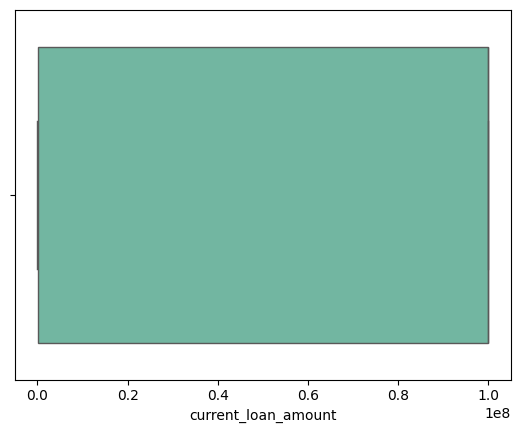

In [31]:
ax = sns.boxplot(data=data['current_loan_amount'], orient="h", palette="Set2")

In [32]:
# check the description their is a placeholder in max value
data[data['current_loan_amount']==99999999.000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
5044,bac918fa-35e0-40a2-af65-58b456a742e7,c96da120-30d2-4acd-9740-e4d280f4bfcb,Fully Paid,99999999,Short Term,739,3.000,Home Mortgage,60012,Home Improvements,1295.260,16.600,33.000,16,0,427,8542.000,0.000,0.000
5045,bb983383-0aa0-4d13-9b7f-05f694672374,d602647a-0820-4025-b93d-9f962f958acf,Fully Paid,99999999,Short Term,704,9.000,Rent,54802,Debt Consolidation,1114.310,16.900,30.000,12,0,4716,5822.000,0.000,0.000
5046,0c7fcf5e-ec4a-46d5-8175-15c846df7c74,a709e893-b6b6-49ed-b775-bdef1155c78d,Fully Paid,99999999,Short Term,751,5.000,Rent,35693,Debt Consolidation,626.120,11.000,NaN,7,0,742,9166.000,0.000,0.000
5047,878c4189-bd53-4836-a16d-203519034758,64fa8876-80fa-4a69-b16b-144a8ecfb14a,Fully Paid,99999999,Short Term,735,NaN,Home Mortgage,33884,Debt Consolidation,683.340,18.900,10.000,12,0,10835,18028.000,0.000,0.000
5048,193ac878-4d50-4be0-995b-20896ebc9ad8,02a4bc6d-db02-406b-9bf6-8e0dd42782eb,Fully Paid,99999999,Short Term,745,3.000,Own Home,103343,Debt Consolidation,1300.410,14.100,NaN,14,0,22746,42835.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16927,08392ffc-202c-47e7-8538-7bdf802d3cd6,00295514-070f-4fb5-958c-dbaf369ce297,Fully Paid,99999999,Short Term,703,6.000,Rent,37487,Debt Consolidation,421.730,17.900,NaN,5,0,5628,7504.000,0.000,0.000
16928,e2cb88d0-9d02-4962-8d74-8aa2c50dc354,bbc3b0e0-ab33-400e-9da5-118bae1cfb84,Fully Paid,99999999,Short Term,699,10.000,Home Mortgage,88047,Debt Consolidation,560.570,12.300,NaN,11,1,4515,7920.000,1.000,0.000
16929,0794ba38-872f-42bb-8209-a7b40c4c606d,967bd827-a1b2-4133-85e4-2f6c56d72964,Fully Paid,99999999,Short Term,696,6.000,Rent,97733,other,450.390,33.000,62.000,8,1,4534,14394.000,0.000,1.000
16930,ac9119ac-564c-4885-a361-a4ff1898e44e,3c8fc36b-be7a-4ba3-87ed-41bb85d9c82e,Fully Paid,99999999,Short Term,691,10.000,Home Mortgage,41144,Debt Consolidation,218.740,15.600,NaN,4,1,4343,9241.000,1.000,0.000


In [33]:
#There are such 8316 samples, which is not low so need to replace it by NA's
data['current_loan_amount'] = [np.nan if int(x)==99999999 else x for x in data['current_loan_amount']]

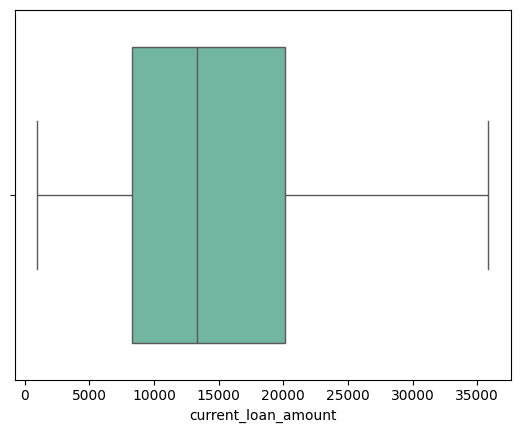

In [34]:
ax = sns.boxplot(data=data['current_loan_amount'], orient="h", palette="Set2")

In [35]:
data.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,5043.000,16931.000,16215.000,16931.000,16931.000,16931.000,7597.000,16931.000,16931.000,16931.000,16930.000,16891.000,16929.000
mean,14908.038,721.339,5.856,72224.965,960.293,18.341,35.228,11.173,0.166,15548.280,31722.521,0.115,0.031
std,8544.099,27.403,3.632,82116.514,635.899,7.115,22.176,5.065,0.486,22688.595,77342.806,0.346,0.271
min,976.000,585.000,0.000,4815.000,0.000,3.800,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,8300.500,710.000,2.000,44303.500,530.535,13.500,16.000,8.000,0.000,6005.000,12784.750,0.000,0.000
50%,13286.000,730.000,6.000,61038.000,838.760,17.000,32.000,10.000,0.000,11109.000,21783.500,0.000,0.000
75%,20097.000,741.000,10.000,86139.000,1246.940,21.800,52.000,14.000,0.000,19456.000,36234.500,0.000,0.000
max,35858.000,751.000,10.000,8713547.000,10831.650,59.500,152.000,76.000,12.000,1730472.000,4483087.000,5.000,9.000


#### Outlier treatment: Annual Income

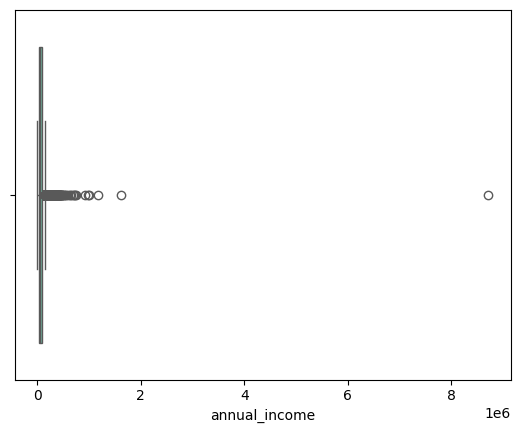

In [36]:
ax = sns.boxplot(data=data['annual_income'], orient="h", palette="Set2")

In [37]:
data[data['annual_income']==8713547.000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
3671,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.000,Short Term,725,10.000,Home Mortgage,8713547,Debt Consolidation,798.740,16.000,NaN,11,0,16462,30429.000,0.000,0.000


In [38]:
data = data[data['annual_income']!=8713547.000]
data.shape

(16930, 19)

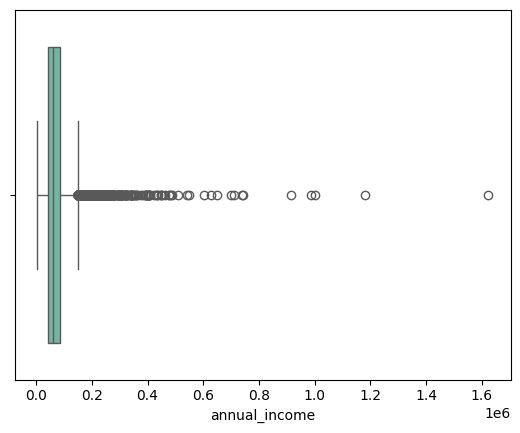

In [39]:
ax = sns.boxplot(data=data['annual_income'], orient="h", palette="Set2")

In [40]:
data[data['annual_income']>1200000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
182,d728b670-7248-4c64-b99e-251d9e7b88a2,a0222c05-0157-4791-b2b9-c74d51774d16,Charged Off,34430.000,Long Term,739,0.000,Home Mortgage,1623105,Debt Consolidation,2637.550,14.700,17.000,15,0,26265,69668.000,0.000,0.000


In [41]:
data[data['annual_income']>1200000].index.values

array([182])

In [42]:
data = data.drop(data[data['annual_income']>1200000].index.values)

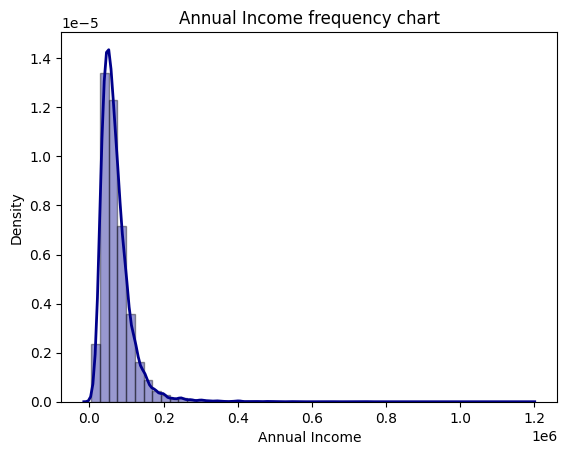

In [43]:
ax = sns.distplot(data['annual_income'].dropna(), hist=True, kde=True,
             color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income')
plt.title('Annual Income frequency chart');
plt.show()

In [44]:
data.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,5041.000,16929.000,16213.000,16929.000,16929.000,16929.000,7596.000,16929.000,16929.000,16929.000,16928.000,16889.000,16927.000
mean,14905.535,721.337,5.856,71622.909,960.203,18.341,35.231,11.172,0.166,15547.593,31720.356,0.115,0.031
std,8540.815,27.405,3.632,46800.543,635.805,7.115,22.177,5.066,0.486,22689.785,77346.824,0.346,0.271
min,976.000,585.000,0.000,4815.000,0.000,3.800,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,8305.000,710.000,2.000,44303.000,530.460,13.500,16.000,8.000,0.000,6005.000,12783.500,0.000,0.000
50%,13286.000,730.000,6.000,61032.000,838.760,17.000,32.000,10.000,0.000,11107.000,21777.500,0.000,0.000
75%,20094.000,741.000,10.000,86138.000,1246.940,21.800,52.000,14.000,0.000,19456.000,36233.500,0.000,0.000
max,35858.000,751.000,10.000,1181520.000,10831.650,59.500,152.000,76.000,12.000,1730472.000,4483087.000,5.000,9.000


#### Outlier Treatment: Years of Credit History

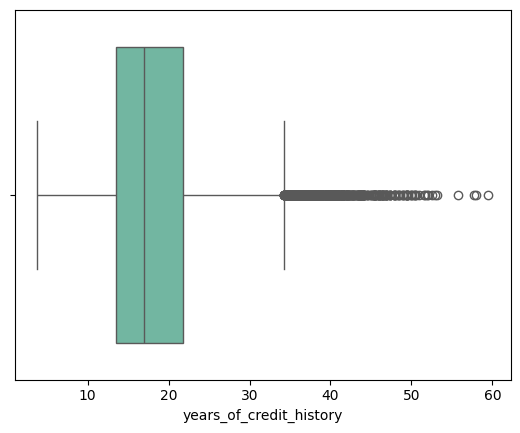

In [45]:
ax = sns.boxplot(data=data['years_of_credit_history'], orient="h", palette="Set2")

In [46]:
data[data['years_of_credit_history']>58].shape

(1, 19)

In [47]:
data = data.drop(data[data['years_of_credit_history']>58].index.values)

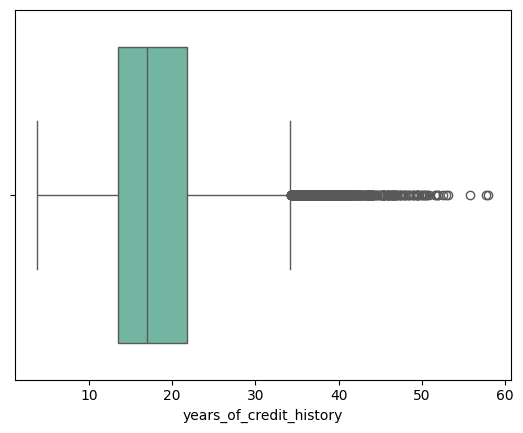

In [48]:
ax = sns.boxplot(data=data['years_of_credit_history'], orient="h", palette="Set2")

In [49]:
data.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,5041.000,16928.000,16212.000,16928.000,16928.000,16928.000,7596.000,16928.000,16928.000,16928.000,16927.000,16888.000,16926.000
mean,14905.535,721.340,5.856,71619.667,960.054,18.339,35.231,11.172,0.166,15545.026,31718.020,0.115,0.031
std,8540.815,27.403,3.632,46800.024,635.529,7.108,22.177,5.066,0.486,22687.996,77348.512,0.346,0.271
min,976.000,585.000,0.000,4815.000,0.000,3.800,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,8305.000,710.000,2.000,44303.000,530.433,13.500,16.000,8.000,0.000,6004.500,12783.000,0.000,0.000
50%,13286.000,730.000,6.000,61029.500,838.755,17.000,32.000,10.000,0.000,11106.500,21774.000,0.000,0.000
75%,20094.000,741.000,10.000,86126.000,1246.910,21.800,52.000,14.000,0.000,19454.500,36230.500,0.000,0.000
max,35858.000,751.000,10.000,1181520.000,10831.650,58.000,152.000,76.000,12.000,1730472.000,4483087.000,5.000,9.000


#### Outlier treatment: Number of Open Accounts

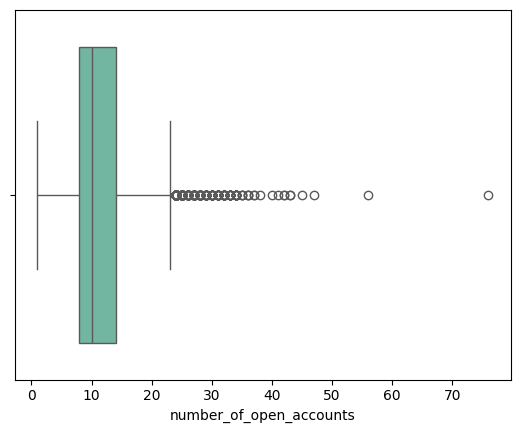

In [50]:
ax = sns.boxplot(data=data['number_of_open_accounts'], orient="h", palette="Set2")

In [51]:
data[data['number_of_open_accounts']>50]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
2251,08dab131-9db3-4184-a32a-e12e48fd5d6c,907c2a89-76f8-4089-9a47-d410bb885339,Charged Off,18755.000,Long Term,670,7.000,Rent,46912,Debt Consolidation,1032.060,27.400,NaN,76,0,22111,28131.000,0.000,0.000
8600,1653fa6e-eaef-41ce-831c-db5172fc966b,9646ae9b-104e-4b8d-913a-cecfbcd11de4,Fully Paid,NaN,Short Term,721,8.000,Rent,67440,Debt Consolidation,1893.920,16.800,NaN,56,0,33929,55169.000,0.000,0.000


In [52]:
data = data.drop(data[data['number_of_open_accounts']>50].index.values)

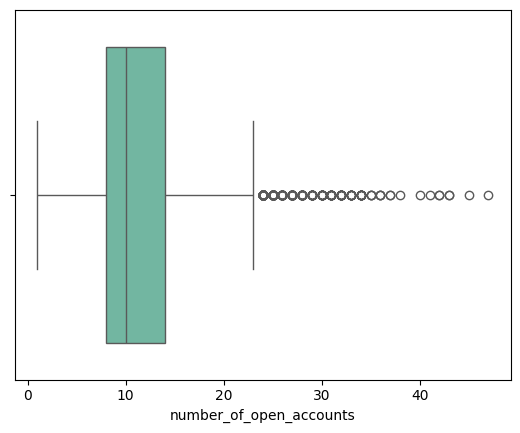

In [53]:
ax = sns.boxplot(data=data['number_of_open_accounts'], orient="h", palette="Set2")

In [54]:
#Capping the outliers
IQR = data['number_of_open_accounts'].quantile(0.75) - data['number_of_open_accounts'].quantile(0.25)
upper_limit = data['number_of_open_accounts'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 23.0


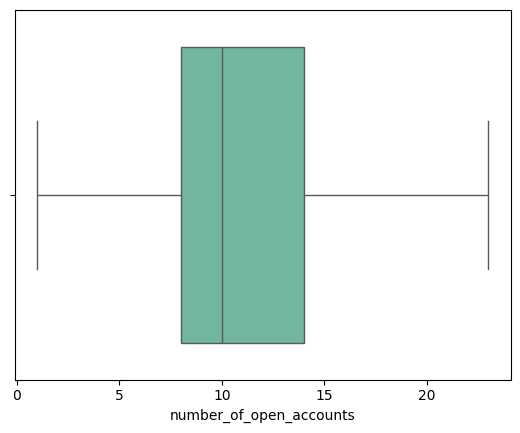

In [55]:
data['number_of_open_accounts'] = [23.0 if ( x>23.0 and x!=np.nan) else x for x in data['number_of_open_accounts']]
ax = sns.boxplot(data=data['number_of_open_accounts'], orient="h", palette="Set2")

In [56]:
print(data.shape)
data.describe()

(16926, 19)


,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,5040.000,16926.000,16210.000,16926.000,16926.000,16926.000,7596.000,16926.000,16926.000,16926.000,16925.000,16886.000,16924.000
mean,14904.771,721.343,5.856,71621.374,959.995,18.339,35.231,11.063,0.166,15543.552,31716.846,0.115,0.031
std,8541.490,27.402,3.632,46802.392,635.526,7.108,22.177,4.697,0.486,22688.840,77352.867,0.346,0.271
min,976.000,585.000,0.000,4815.000,0.000,3.800,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,8302.750,710.000,2.000,44303.000,530.378,13.500,16.000,8.000,0.000,6003.500,12782.000,0.000,0.000
50%,13286.000,730.000,6.000,61029.500,838.665,17.000,32.000,10.000,0.000,11106.000,21774.000,0.000,0.000
75%,20095.500,741.000,10.000,86134.000,1246.885,21.800,52.000,14.000,0.000,19453.750,36228.000,0.000,0.000
max,35858.000,751.000,10.000,1181520.000,10831.650,58.000,152.000,23.000,12.000,1730472.000,4483087.000,5.000,9.000


In [57]:
data.to_csv("Partialclean_Loandata.csv", index=False)

In [58]:
data = pd.read_csv("Partialclean_Loandata.csv")
data.shape

(16926, 19)

Now, all outliers has been handled so let's check the missing values.

In [59]:
data.isnull().sum()

loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount             11886
term                                0
credit_score                        0
years_in_current_job              716
home_ownership                      0
annual_income                       0
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent     9330
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 1
bankruptcies                       40
tax_liens                           2
dtype: int64

#### Missing Value Treatment: Bankruptcies & Tax Liens

In [60]:
# Since percentage value of Missing values in Bankruptcies and Tax Liens are very low we can delete the rows
data = data.dropna(subset=['bankruptcies', 'tax_liens'])
print(data.shape)
data.isnull().sum()

(16886, 19)


loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount             11856
term                                0
credit_score                        0
years_in_current_job              716
home_ownership                      0
annual_income                       0
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent     9330
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

#### Missing Value Treatment: Months Since Last Delinquent
This feature describes the number of months since the credit is not paid, so NA's actually are the genuine customers so replacing it with 0.

In [61]:
data["months_since_last_delinquent"].fillna(0, inplace = True)
print(data.shape)
data.isnull().sum()

(16886, 19)


loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount             11856
term                                0
credit_score                        0
years_in_current_job              716
home_ownership                      0
annual_income                       0
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent        0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

#### Missing Value Treatment: Current Loan Amount, Credit Score, Years In Current Job, Annual Income
Applying 'Iterative Imputer' using default estimator 'Bayesian Ridge' which is Regularized Linear Regression.

In [62]:
data.reset_index(drop=True, inplace=True)
my_imputer = IterativeImputer()
#For this we need only numerical variables so filtering this
data_numerical = data._get_numeric_data()
data_numerical_columns = data_numerical.columns
print(data_numerical.shape)
data_numerical.isnull().sum()

(16886, 13)


current_loan_amount             11856
credit_score                        0
years_in_current_job              716
annual_income                       0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent        0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

In [63]:
data_imputed = my_imputer.fit_transform(data_numerical)
#Imputer will give the array as an object so need to convert it to Dataframe with columns
data_imputed = pd.DataFrame(data_imputed, columns=data_numerical_columns)
data_imputed.isnull().sum()

current_loan_amount             0
credit_score                    0
years_in_current_job            0
annual_income                   0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

In [64]:
data_imputed.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,16886.000,16886.000,16886.000,16886.000,16886.000,16886.000,16886.000,16886.000,16886.000,16886.000,16886.000,16886.000,16886.000
mean,14599.992,721.333,5.878,71648.780,960.864,18.334,15.808,11.066,0.167,15554.027,31712.951,0.115,0.031
std,6472.444,27.403,3.562,46814.770,635.164,7.108,22.963,4.695,0.486,22697.329,77405.227,0.346,0.271
min,-1485.148,585.000,0.000,4815.000,0.000,3.800,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,10416.160,710.000,3.000,44316.000,531.595,13.500,0.000,8.000,0.000,6013.000,12794.500,0.000,0.000
50%,13488.628,730.000,6.000,61038.000,839.205,17.000,0.000,10.000,0.000,11111.000,21787.000,0.000,0.000
75%,17473.023,741.000,10.000,86139.000,1247.273,21.800,28.000,14.000,0.000,19456.000,36234.500,0.000,0.000
max,94974.038,751.000,11.099,1181520.000,10831.650,58.000,152.000,23.000,12.000,1730472.000,4483087.000,5.000,9.000


Plotting histogram to see the difference between without na values and after replacing na values with Iterative Imputer.
data_numerical is our Dataframe with NA's, while, data_imputed is our Dataframe without NA's.

#### Histogram: Current Loan Amount

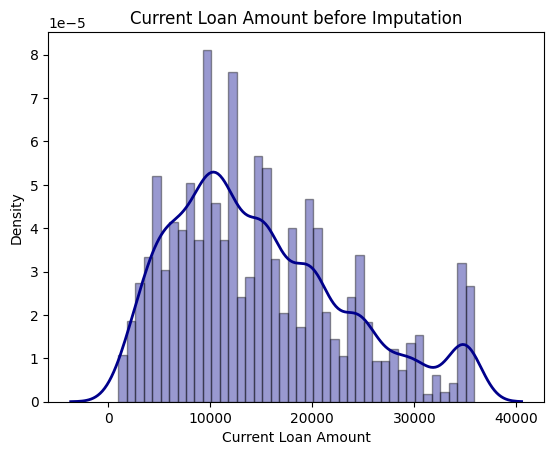

In [65]:
ax = sns.distplot(data_numerical['current_loan_amount'].dropna(), hist=True, kde=True,
             bins=int(42740/1000), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount')
plt.title('Current Loan Amount before Imputation');
plt.show()

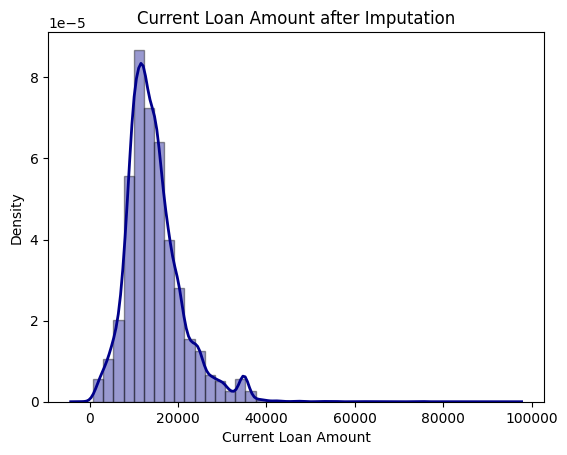

In [66]:
ax = sns.distplot(data_imputed['current_loan_amount'], hist=True, kde=True,
             bins=int(42740/1000), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount')
plt.title('Current Loan Amount after Imputation');
plt.show()

In [67]:
temp = data_imputed[data_imputed['current_loan_amount']<40000]

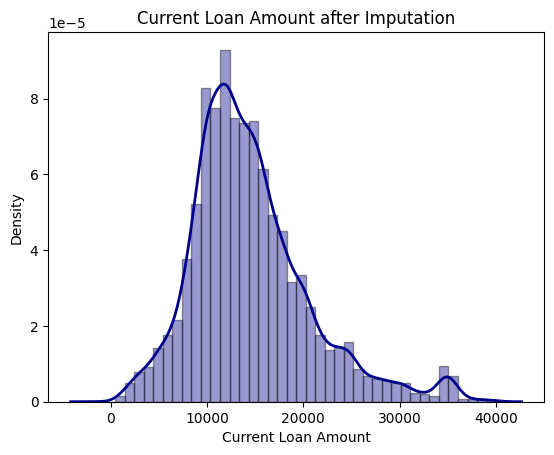

In [68]:
ax = sns.distplot(temp['current_loan_amount'], hist=True, kde=True,
             bins=int(42740/1000), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount')
plt.title('Current Loan Amount after Imputation');
plt.show()

#### Histogram: Credit Score

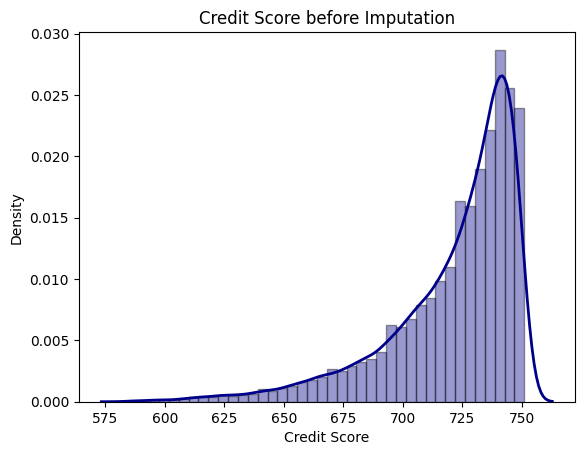

In [69]:
ax = sns.distplot(data_numerical['credit_score'].dropna(), hist=True, kde=True,
             bins=int(800/20), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Credit Score')
plt.title('Credit Score before Imputation');
plt.show()

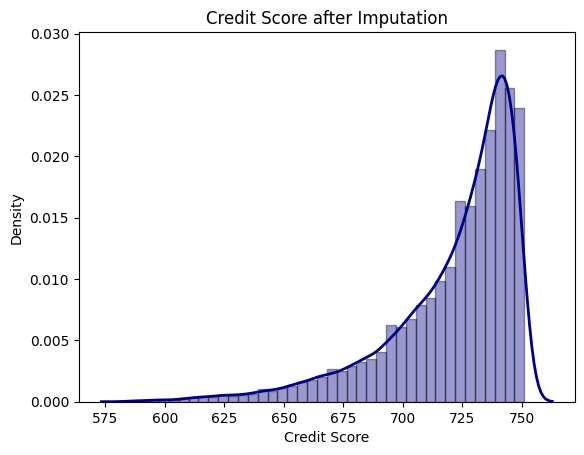

In [70]:
ax = sns.distplot(data_imputed['credit_score'], hist=True, kde=True,
             bins=int(800/20), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Credit Score')
plt.title('Credit Score after Imputation');
plt.show()

#### Histogram: Annual Income

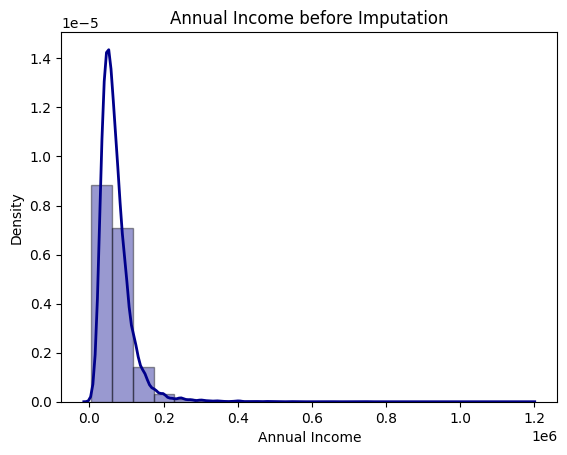

In [71]:
ax = sns.distplot(data_numerical['annual_income'].dropna(), hist=True, kde=True,
             bins=int(215580/10000), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income')
plt.title('Annual Income before Imputation');
plt.show()

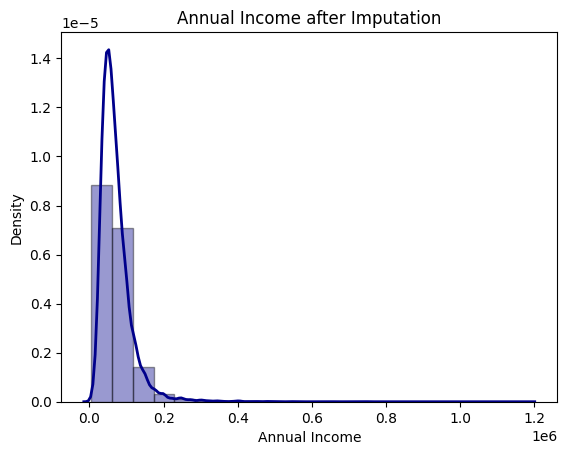

In [72]:
ax = sns.distplot(data_imputed['annual_income'], hist=True, kde=True,
             bins=int(215580/10000), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income')
plt.title('Annual Income after Imputation');
plt.show()

#### Histogram: Years In Current Job

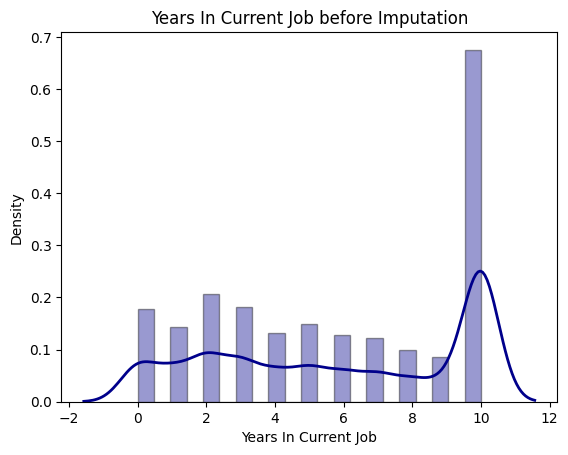

In [73]:
ax = sns.distplot(data_numerical['years_in_current_job'].dropna(), hist=True, kde=True,
             bins=int(215580/10000), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Years In Current Job')
plt.title('Years In Current Job before Imputation');
plt.show()

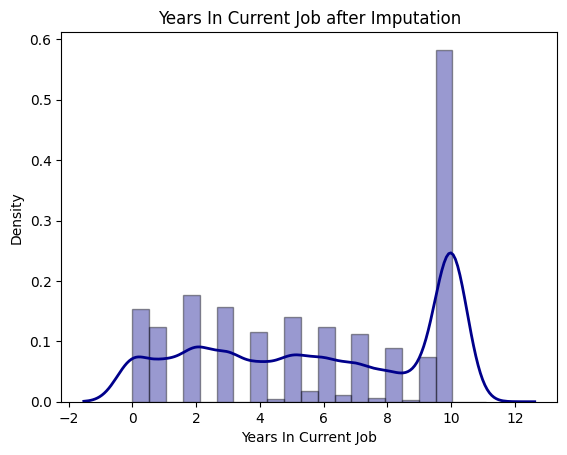

In [74]:
ax = sns.distplot(data_imputed['years_in_current_job'], hist=True, kde=True,
             bins=int(215580/10000), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Years In Current Job')
plt.title('Years In Current Job after Imputation');
plt.show()

Replacing the feature in data dataframe by above Imputed dataframe.

In [75]:
data_imputed.shape

(16886, 13)

In [76]:
data.shape

(16886, 19)

In [77]:
data['years_in_current_job'] = data_imputed['years_in_current_job']
data['current_loan_amount'] = data_imputed['current_loan_amount']
data['credit_score'] = data_imputed['credit_score']
data['annual_income'] = data_imputed['annual_income']
data['monthly_debt'] = data_imputed['monthly_debt']

In [78]:
print(data.shape)
data.isnull().sum()

(16886, 19)


loan_id                         0
customer_id                     0
loan_status                     0
current_loan_amount             0
term                            0
credit_score                    0
years_in_current_job            0
home_ownership                  0
annual_income                   0
purpose                         0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

#### Converting Months since last delinquent into categories

In [79]:
data['months_since_last_delinquent'] = ['extreme_risk' if x>51
        else 'high_risk' if x>32
        else 'moderate_risk' if x>16
        else 'low_risk' if x>0 else 'no_risk' for x in data['months_since_last_delinquent']]

In [80]:
data['months_since_last_delinquent'].unique()

array(['low_risk', 'no_risk', 'moderate_risk', 'extreme_risk',
       'high_risk'], dtype=object)

#### Dropping of Loan ID and Customer ID as we have removed the duplicates and now it's not required further.

In [81]:
data.drop(['loan_id', 'customer_id'], axis=1, inplace=True)
data.shape

(16886, 17)

## Handling Categorical Variables
#### We have 5 Categorical Variables in our data which are as below:

1.Term

2.Home Ownership

3.Purpose

4.Months Since Last Delinquent

5.Loan Status

We will apply Label Encoding to Loan Status as this is a dependent variable, while for other we will apply One Hot Encoding.

In [82]:
# importing one hot encoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [83]:
#Applying Label Encoding to Loan Status
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data.loan_status)
print(le.classes_)

['Charged Off' 'Fully Paid']


In [84]:
data.loan_status.unique()

array([0, 1])

In [85]:
data.term.unique()

array(['Short Term', 'Long Term'], dtype=object)

In [86]:
data.home_ownership.unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [87]:
data['home_ownership'] = ['Mortgage' if 'Mortgage' in x else x for x in data['home_ownership']]

In [88]:
data.home_ownership.unique()

array(['Rent', 'Mortgage', 'Own Home'], dtype=object)

In [89]:
data.purpose.unique()

array(['Debt Consolidation', 'Home Improvements', 'other',
       'Business Loan', 'small_business', 'Other', 'moving', 'Buy a Car',
       'Medical Bills', 'Buy House', 'Take a Trip', 'vacation',
       'major_purchase', 'Educational Expenses', 'wedding',
       'renewable_energy'], dtype=object)

So if you see here there can be n number of purpose to take loan its define and its actually not needed to data the model so dropping this feature.

In [90]:
data.drop(['purpose'], axis=1, inplace=True)

In [91]:
data.months_since_last_delinquent.unique()

array(['low_risk', 'no_risk', 'moderate_risk', 'extreme_risk',
       'high_risk'], dtype=object)

In [92]:
cols_to_transform = ['term', 'months_since_last_delinquent', 'home_ownership' ]
data_with_dummies = pd.get_dummies(data, prefix=cols_to_transform )

In [93]:
data_with_dummies

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,...,term_Long Term,term_Short Term,months_since_last_delinquent_Mortgage,months_since_last_delinquent_Own Home,months_since_last_delinquent_Rent,home_ownership_extreme_risk,home_ownership_high_risk,home_ownership_low_risk,home_ownership_moderate_risk,home_ownership_no_risk
0,0,12232.000,728.000,0.000,46643.000,777.390,18.000,12.000,0,6762,...,0,1,0,0,1,0,0,1,0,0
1,0,25014.000,733.000,10.000,81099.000,892.090,26.700,14.000,0,35706,...,1,0,1,0,0,0,0,0,0,1
2,0,16117.000,724.000,9.000,60438.000,1244.020,16.700,11.000,1,11275,...,0,1,1,0,0,0,0,0,1,0
3,0,11716.000,740.000,3.000,34171.000,990.940,10.000,21.000,0,7009,...,0,1,0,0,1,0,0,0,0,1
4,0,9789.000,686.000,10.000,47003.000,503.710,16.700,13.000,1,16913,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16881,1,14530.656,733.000,10.000,45590.000,1276.530,29.000,12.000,0,4967,...,0,1,1,0,0,0,0,1,0,0
16882,1,11778.899,703.000,6.000,37487.000,421.730,17.900,5.000,0,5628,...,0,1,0,0,1,0,0,0,0,1
16883,1,15452.357,699.000,10.000,88047.000,560.570,12.300,11.000,1,4515,...,0,1,1,0,0,0,0,0,0,1
16884,1,16767.687,696.000,6.000,97733.000,450.390,33.000,8.000,1,4534,...,0,1,0,0,1,1,0,0,0,0


## EDA
#### Checking the distribution of Dependent Variable

In [94]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(data_with_dummies['loan_status'])
percentage_labels = (data_with_dummies['loan_status'].value_counts()/total_len)*100
percentage_labels

1   70.212
0   29.788
Name: loan_status, dtype: float64

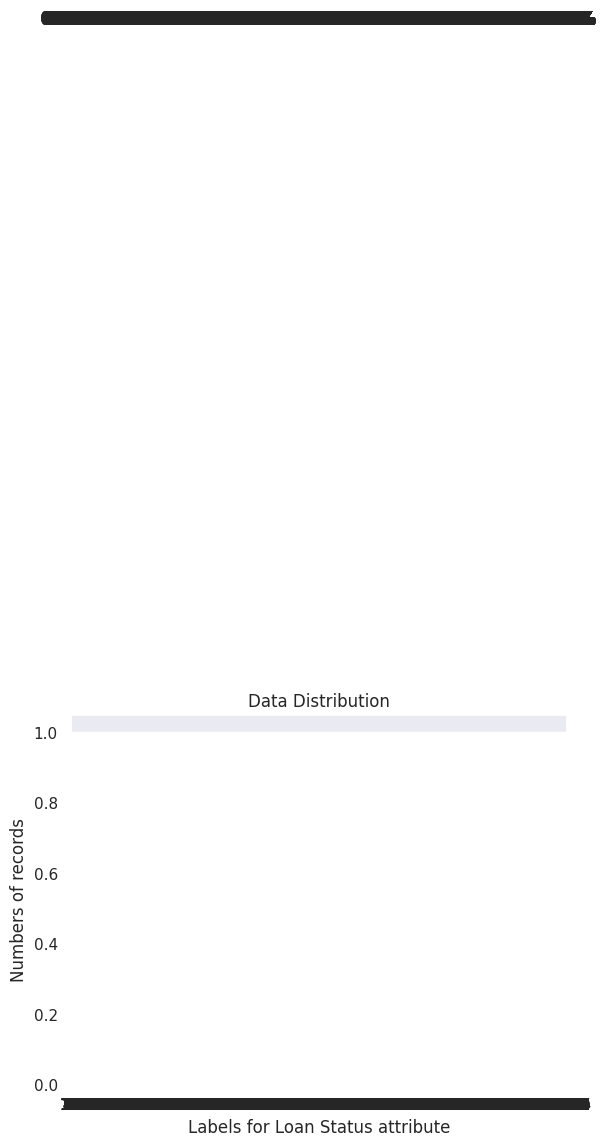

In [95]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(data_with_dummies.loan_status).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Labels for Loan Status attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [96]:
# Get the correlation of the dataing dataset
correlation = data_with_dummies[1:].corr()
correlation

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,...,term_Long Term,term_Short Term,months_since_last_delinquent_Mortgage,months_since_last_delinquent_Own Home,months_since_last_delinquent_Rent,home_ownership_extreme_risk,home_ownership_high_risk,home_ownership_low_risk,home_ownership_moderate_risk,home_ownership_no_risk
loan_status,1.000,-0.032,0.249,0.007,0.079,-0.013,0.046,-0.014,-0.002,0.004,...,-0.184,0.184,0.057,-0.007,-0.053,0.005,0.005,-0.021,-0.003,0.009
current_loan_amount,-0.032,1.000,-0.288,0.178,0.689,0.644,0.246,0.292,-0.072,0.364,...,0.338,-0.338,0.216,-0.029,-0.201,-0.026,0.004,0.081,0.014,-0.046
credit_score,0.249,-0.288,1.000,-0.004,0.013,-0.082,0.091,-0.027,-0.049,-0.008,...,-0.485,0.485,0.049,-0.008,-0.045,-0.022,-0.032,-0.052,-0.035,0.089
years_in_current_job,0.007,0.178,-0.004,1.000,0.095,0.131,0.233,0.047,0.036,0.094,...,0.061,-0.061,0.189,0.016,-0.200,0.027,0.020,0.035,0.019,-0.064
annual_income,0.079,0.689,0.013,0.095,1.000,0.568,0.196,0.180,-0.027,0.333,...,0.083,-0.083,0.216,-0.046,-0.192,0.001,0.014,0.078,0.024,-0.075
monthly_debt,-0.013,0.644,-0.082,0.131,0.568,1.000,0.199,0.423,-0.062,0.465,...,0.145,-0.145,0.215,-0.038,-0.195,0.005,0.008,0.077,0.008,-0.062
years_of_credit_history,0.046,0.246,0.091,0.233,0.196,0.199,1.000,0.130,0.065,0.194,...,0.030,-0.030,0.181,0.026,-0.198,0.037,0.058,0.076,0.032,-0.128
number_of_open_accounts,-0.014,0.292,-0.027,0.047,0.180,0.423,0.130,1.000,-0.018,0.211,...,0.075,-0.075,0.137,-0.017,-0.128,0.021,0.004,0.072,0.014,-0.070
number_of_credit_problems,-0.002,-0.072,-0.049,0.036,-0.027,-0.062,0.065,-0.018,1.000,-0.098,...,-0.029,0.029,-0.012,0.013,0.005,0.080,-0.007,-0.015,0.004,-0.040
current_credit_balance,0.004,0.364,-0.008,0.094,0.333,0.465,0.194,0.211,-0.098,1.000,...,0.086,-0.086,0.141,-0.001,-0.142,-0.032,-0.029,-0.008,-0.030,0.063


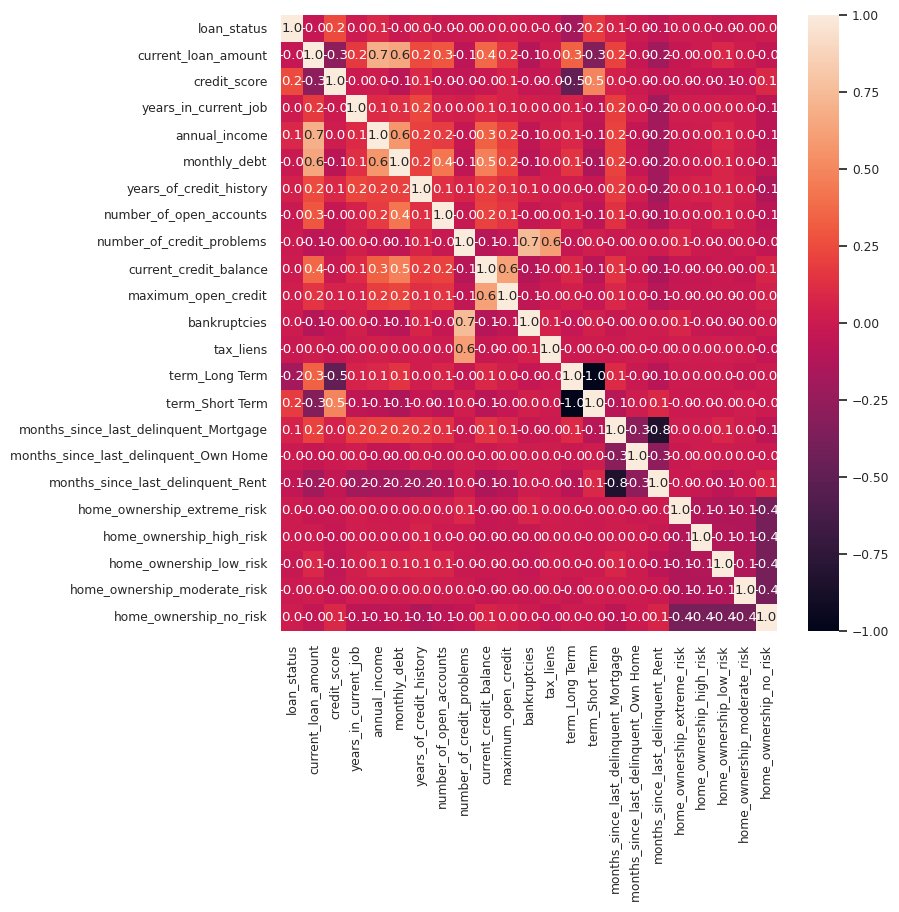

In [97]:
sns.set(font_scale=0.8)
sns.heatmap(data_with_dummies[1:].corr(),annot=True,fmt=".1f")
sns.set(rc={'figure.figsize':(25,15)})
plt.show()

## Feature Selection

In [98]:
X = data_with_dummies.drop('loan_status',axis=1)
y = data_with_dummies.loan_status

In [99]:
features_label = X.columns

In [100]:
#Fitting Random Forest Classification to the dataing set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
print(importances)

[0.28916144 0.099171   0.04149717 0.10608981 0.09554319 0.0714155
 0.050606   0.0081171  0.07789978 0.07454183 0.00609697 0.00285433
 0.01337138 0.01191685 0.0066158  0.00476842 0.00657069 0.00628687
 0.00594397 0.00632014 0.00626931 0.00894245]


In [101]:
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) current_loan_amount            0.289161
 2) credit_score                   0.106090
 3) years_in_current_job           0.099171
 4) annual_income                  0.095543
 5) monthly_debt                   0.077900
 6) years_of_credit_history        0.074542
 7) number_of_open_accounts        0.071416
 8) number_of_credit_problems      0.050606
 9) current_credit_balance         0.041497
10) maximum_open_credit            0.013371
11) bankruptcies                   0.011917
12) tax_liens                      0.008942
13) term_Long Term                 0.008117
14) term_Short Term                0.006616
15) months_since_last_delinquent_Mortgage 0.006571
16) months_since_last_delinquent_Own Home 0.006320
17) months_since_last_delinquent_Rent 0.006287
18) home_ownership_extreme_risk    0.006269
19) home_ownership_high_risk       0.006097
20) home_ownership_low_risk        0.005944
21) home_ownership_moderate_risk   0.004768
22) home_ownership_no_risk         0.002854


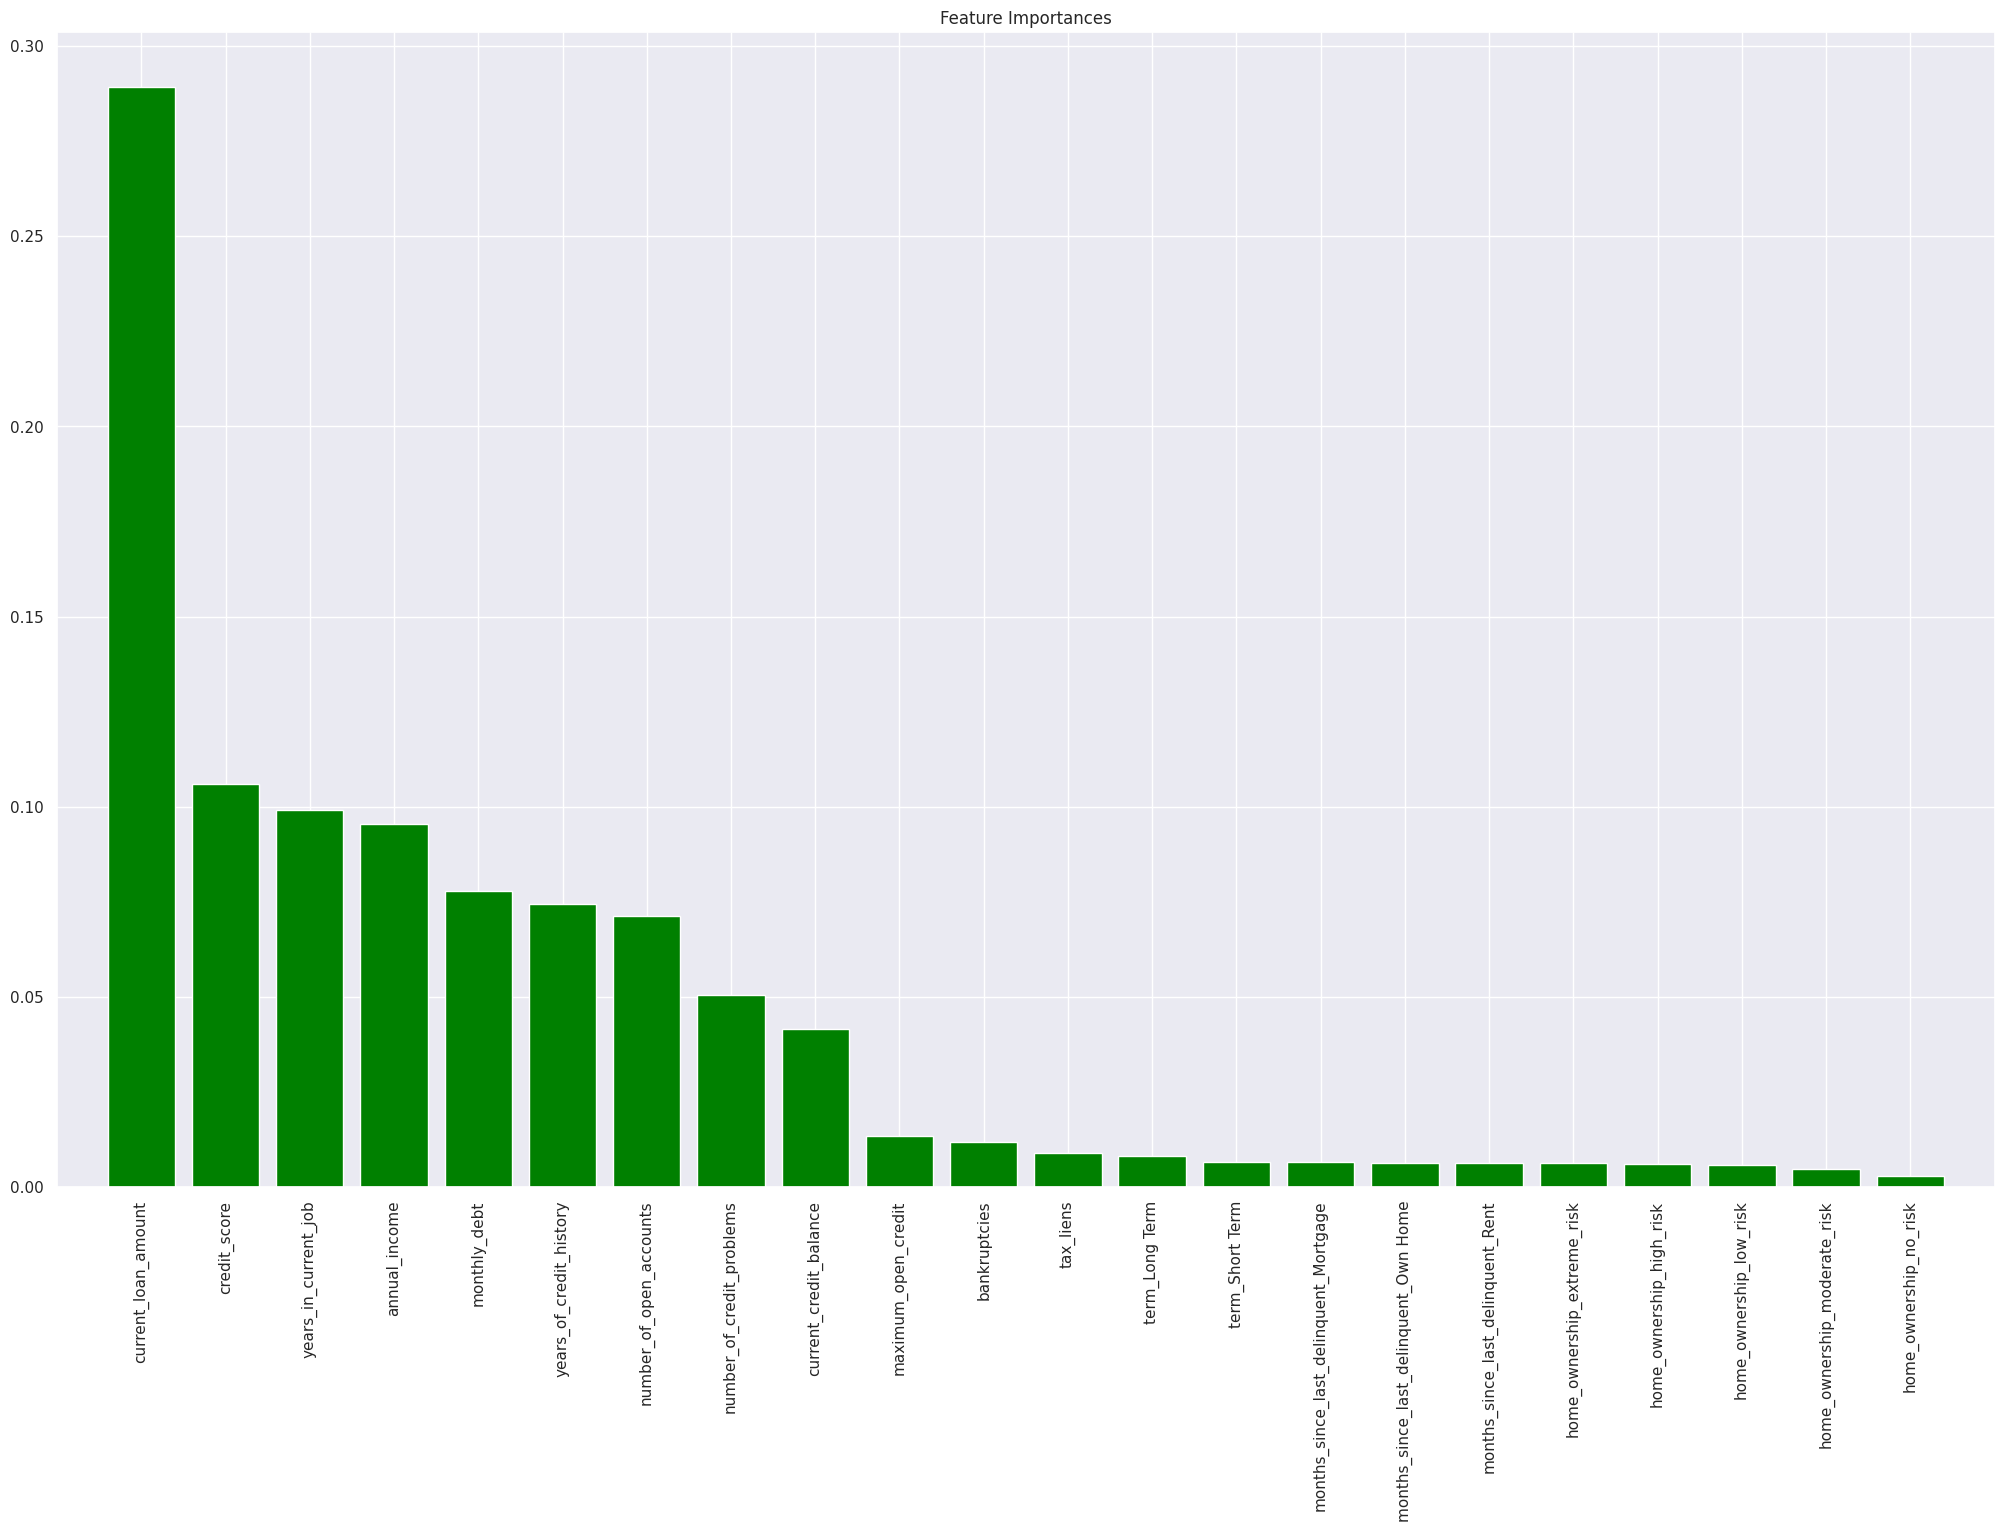

In [102]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Train and Build Baseline Model

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,auc

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [105]:
Random = RandomForestClassifier(n_estimators=10)

Random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [106]:
# Predicting the Test set results
y_pred = Random.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [107]:
cm

array([[ 598,  389],
       [ 193, 2198]])

In [108]:
accuracy

0.827708703374778

#### Filtering Features

In [109]:
X_filter = X[['current_loan_amount', 'credit_score', 'years_in_current_job', 'annual_income', 'monthly_debt', 'years_of_credit_history',
             'number_of_open_accounts', 'number_of_credit_problems', 'current_credit_balance']]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_filter, y, test_size = 0.20, random_state = 42, stratify=y)

In [111]:
Random = RandomForestClassifier(n_estimators=10)

Random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [112]:
# Predicting the Test set results
y_pred = Random.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [113]:
cm

array([[ 718,  288],
       [ 131, 2241]])

In [114]:
acc

0.8759621077560686

#### Hyperparameter Tuning

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
# Number of trees in random forest
n_estimators = [50,100,150,200,250,300]
# Minimum number of samples required to split a node
min_samples_split = [10, 15, 20, 25, 30, 35]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split}

In [117]:
#Use the random grid to search for best hyperparameters
#First create the base model to tune
rf = RandomForestClassifier()
#Random search of parameters, using 5 fold cross validation,
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv=5, random_state=42)
#Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'min_samples_split': [10, 15, 20, 25,
                                                              30, 35],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42)

In [118]:
rf_random.best_params_

{'n_estimators': 150, 'min_samples_split': 15}

In [119]:
Random = RandomForestClassifier(n_estimators=300, min_samples_split=35, max_features='sqrt',
                               bootstrap=True, oob_score=True, random_state=42)

Random.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=35, n_estimators=300, oob_score=True,
                       random_state=42)

In [120]:
# Predicting the Test set results
y_pred = Random.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [121]:
cm

array([[ 639,  367],
       [  46, 2326]])

In [122]:
acc

0.8777383066903494

#### Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(class_weight='balanced')
Logistic.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [124]:
# Predicting the Test set results
y_pred = Logistic.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [125]:
cm

array([[ 569,  437],
       [1040, 1332]])

In [126]:
acc

0.5627590290112493

#### KNN

In [127]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [128]:
y_pred = KNN.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [129]:
cm

array([[ 524,  482],
       [ 160, 2212]])

In [130]:
acc

0.8099467140319716

#### Gradient Boosting

In [131]:
# Fitting GradientBoosting to the Training set
from sklearn.ensemble import GradientBoostingClassifier
GradientBoo = GradientBoostingClassifier()
GradientBoo.fit(X_train, y_train)

GradientBoostingClassifier()

In [132]:
# Predicting the Test set results
y_pred = GradientBoo.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cm

array([[ 583,  423],
       [  52, 2320]])

In [133]:
acc

0.859384251036116

## Model Deployment

In [134]:
import pickle

In [135]:
pickle.dump(Random, open('model_final.pkl','wb'))

In [136]:
X_test.head()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance
14533,10027.812,741.000,2.000,41320.000,600.170,17.800,11.000,0,10594
9527,21146.151,742.000,6.000,112378.000,2294.390,22.100,23.000,0,40438
4386,10773.000,726.000,6.980,43598.000,821.090,33.300,11.000,0,16446
4127,15923.000,734.000,7.000,49760.000,1082.700,17.700,15.000,0,6096
6437,17633.090,743.000,1.000,110682.000,1651.000,14.600,20.000,0,9505


In [137]:
X_test.columns

Index(['current_loan_amount', 'credit_score', 'years_in_current_job',
       'annual_income', 'monthly_debt', 'years_of_credit_history',
       'number_of_open_accounts', 'number_of_credit_problems',
       'current_credit_balance'],
      dtype='object')

In [138]:
y_test.head()

14533    1
9527     1
4386     0
4127     0
6437     1
Name: loan_status, dtype: int64

In [139]:
model = pickle.load(open('model_final.pkl','rb'))
print(model.predict([[10000, 580, 5, 500000, 1500, 15, 5, 0, 10000]]))

[0]


In [140]:
model.predict([[12753.000,739.000,10.000,54446.000,671.490,17.400,11.000,0,13933]])

array([1])